# Home Assignment No. 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time

import warnings
warnings.filterwarnings('ignore')

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and shift by mean and scale by standard deviation each column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [11]:
def normalize(arr):
    """Shift by mean and scale by standard deviation each column of a matrix.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to normalize.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = arr - arr.mean(axis=0)
    std = arr.std(axis=0)
    if std:
        out /= std
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{5,9\}$, $r\in\{2,3\}$, $d\in\{3,4\}$.

Make sure that each plot has different color.

To compute LCM you can use `math.gcd` and relationship between LCM and GCD

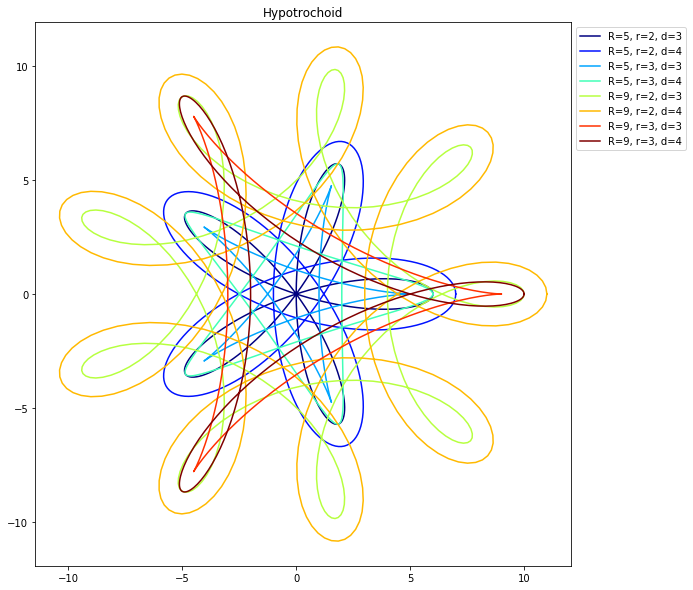

In [3]:
### BEGIN Solution (do not delete this comment)
import math

R = [5, 9]
r = [2, 3]
d = [3, 4]
lcm = lambda a, b: abs(a*b) / math.gcd(a, b)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(R)*len(r)*len(d))]
i = 0

for Ri in R:
    for ri in r:
        for di in d:
            t = np.linspace(0, lcm(ri, Ri)*2*np.pi/Ri, num=300)
            x = (Ri - ri) * np.cos(t) + di * np.cos((Ri - ri) * t / ri)
            y = (Ri - ri) * np.sin(t) - di * np.sin((Ri - ri) * t / ri)
            ax.plot(x, y, label=f'R={Ri}, r={ri}, d={di}', color=colors[i])
            i += 1
            
ax.set_title('Hypotrochoid')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_aspect('equal')

### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{20}, \tfrac14, \tfrac12, 1, 1.5, 2, 5, 10, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

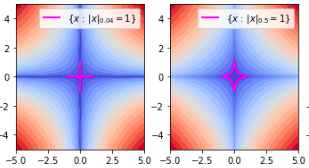

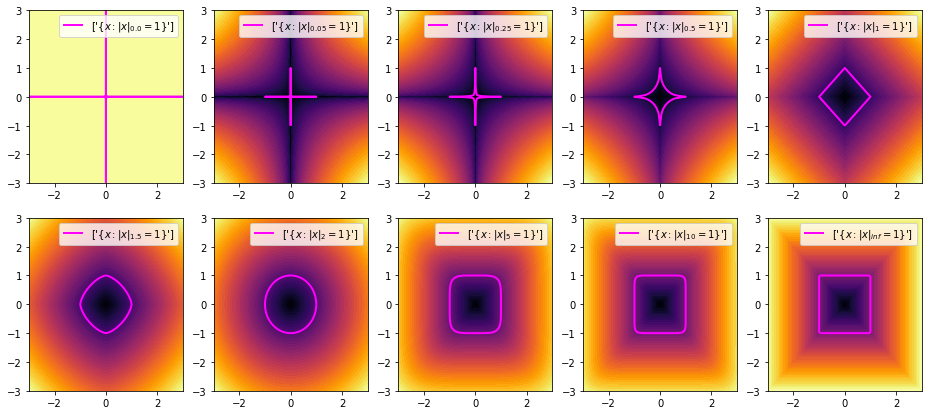

In [160]:
p_values = [0., 0.05, 0.25, 0.5, 1, 1.5, 2, 5, 10, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(16, 7))

labels = ['lol']*len(p_values)
i = 0
for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution (do not delete this comment)
    z = np.linalg.norm(np.concatenate((xx.reshape(-1, 1), 
                                       yy.reshape(-1, 1)), axis=1),
                       ord=p, axis=1).reshape(xx.shape)
    ax.contourf(xx, yy, z, linewidths=10, levels=50, cmap='inferno')
    cntr = ax.contour(xx, yy, z, levels=[1], linewidths=2, colors="magenta")
    ax.legend(cntr.legend_elements()[0], [['{$x: |x|_{'+str(p)+'} = 1 $}']])
    i+=1
    ### END Solution (do not delete this comment)
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [36]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

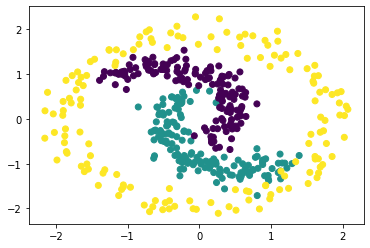

In [37]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 20$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $5$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![title](data/ex.png)

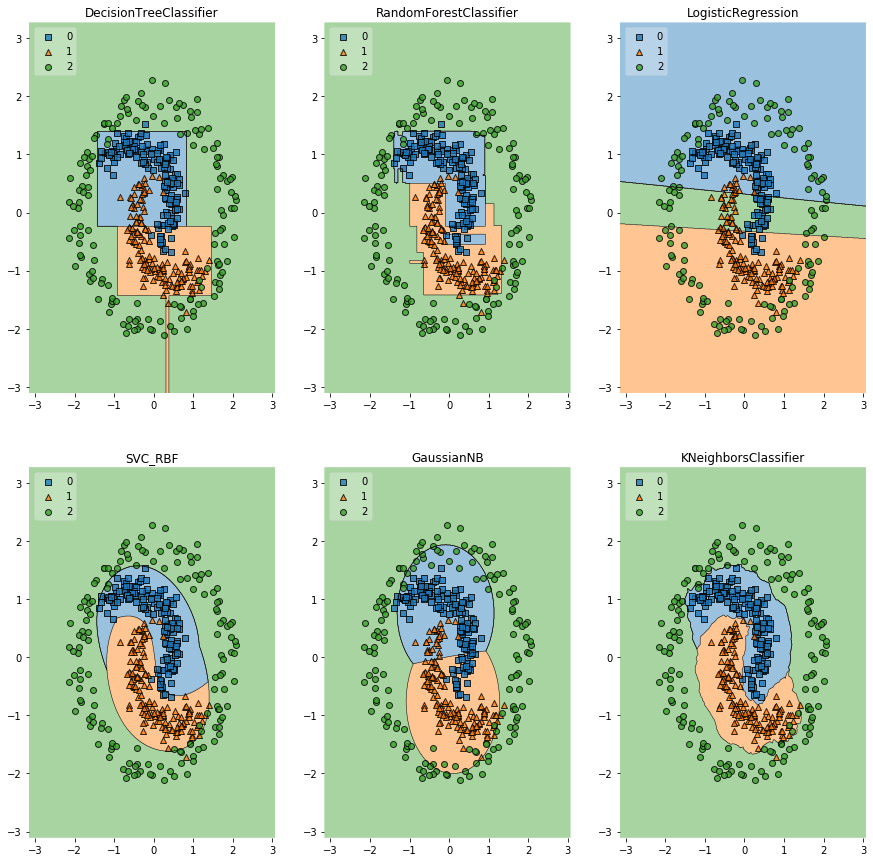

In [38]:
### BEGIN Solution (do not delete this comment)
rnd = 42
clfs = {'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=4, random_state=rnd),
        'RandomForestClassifier': RandomForestClassifier(n_estimators=7, max_depth=4, random_state=rnd),
        'LogisticRegression': LogisticRegression(random_state=rnd),
        'SVC_RBF': SVC(kernel='rbf'), 
        'GaussianNB': GaussianNB(),
        'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5)
       }
fig, axs = plt.subplots(2, 3, figsize=(15,15))

for ax, name in zip(axs.flat, clfs.keys()):
    clfs[name].fit(X, y)
    fig = plot_decision_regions(X, y, clf=clfs[name], legend=2, ax=ax)
    ax.set_title(name)
### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

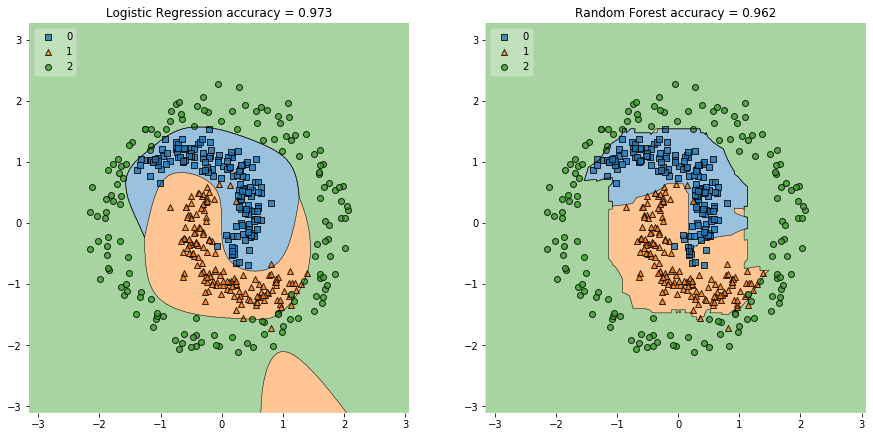

In [44]:
### BEGIN Solution (do not delete this comment)

# Choose two classifiers from the previous problem among Decision Tree, Random Forest, 
# Naive Bayes, Logistic Regression;
clf_logreg = LogisticRegression(random_state=rnd)
clf_forest = RandomForestClassifier(n_estimators=6, max_depth=4, random_state=rnd)

# By generating of additional features (e.g. polynomial) make them achieve accuracy >0.95.
poly1 = PolynomialFeatures(8)
poly2 = PolynomialFeatures(8)
scaler = StandardScaler()
gauss = GaussianRandomProjection(12)
pipe_logreg = Pipeline([('transform', poly1), ('model', clf_logreg)])
pipe_forest = Pipeline([('transform', poly2), ('model', clf_forest)])

pipe_logreg.fit(X, y)
y_pred_logreg = pipe_logreg.predict(X)

pipe_forest.fit(X, y)
y_pred_forest = pipe_forest.predict(X)

# Plot their decision rules in the original feature space.
fig, axs = plt.subplots(1, 2, figsize=(15,15))

plot_decision_regions(X, y, clf=pipe_logreg, legend=2, ax=axs[0], feature_index=(0,1))
axs[0].set_title(f'Logistic Regression accuracy = {accuracy_score(y, y_pred_logreg):.3}')
plot_decision_regions(X, y, clf=pipe_forest, legend=2, ax=axs[1], feature_index=(0,1))
axs[1].set_title(f'Random Forest accuracy = {accuracy_score(y, y_pred_forest):.3}')

axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

When we decide on degree of polynomial features we should consider the complexity of the data -- if the decision boundary is more complicated, a higher order polynomial should be used. Here we can observe that points tend to curl and we might use some polynomials with degree >= 4 to separate such sophisticated points. As we add new features the logistic regression will use a hyperplane as decision boundary that will exploit new dependences for prediction.

Decision tree also improve their prediction with new features because now they can use more sophisticated decision boundaries in their nodes. So they can separate the data with parabolas and other functions. This increases flexibility of the model and it can catch more extreme data dependences.

However for real-case tasks with train and tasks we should be careful,as too high polynomial degree the over-fitting phenomenon might occur. Also, we could also use Gaussian Projector to decrease amount of features, that grows exponentionaly for new polynomial degree what may be hard to use in computing. 

 

## Task 5. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [1]:
len(['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat', 'sub_area_Poselenie Shherbinka', 'sub_area_Poselenie Rogovskoe', 'sub_area_Babushkinskoe'])

21

In [356]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength
n = len(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28.0,39.70
715,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90.0,39.66


Please note that both in Task 4 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data).

In this problem, we do a step further and split the whole data into the **train part** (on which we train), **validation part** (on which we tune hyperparameters) and **test part** (where we compute the final test score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 5.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the validation data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the train score, the validation score and the test score (use the model with best hyperparameters refitted on the train set).

In [450]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import make_scorer, mean_squared_error
rnd = 42

params_grid = {'n_estimators': np.arange(100, 1020, step=int((1020-100)/25)),
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': np.arange(2, 50, step=int((50-2)/20)),
               'min_samples_split': [2, 10, 100]}

clf_forest = RandomForestRegressor(random_state=rnd)
clf_extra_trees = ExtraTreesRegressor(random_state=rnd)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

val_fold = [-1 for _ in range(y_train.shape[0])] + [0 for _ in range(y_val.shape[0])]
y_train_val = np.concatenate([y_train, y_val])
X_train_val = np.vstack((X_train, X_val))

print('Start GridSearch for Random Forest')

grid_forest = GridSearchCV(estimator=clf_forest, 
                           param_grid=params_grid, 
                           cv = PredefinedSplit(val_fold), verbose=2, 
                           scoring=scorer, n_jobs = -1).fit(X_train_val, y_train_val)
print('Random Forest best params and best score:', 
      grid_forest.best_params_, -1*grid_forest.best_score_)

clf_forest_bst = RandomForestRegressor(**grid_forest.best_params_, random_state=rnd)
clf_forest_bst.fit(X_train, y_train)
print()
y_pred_train = clf_forest_bst.predict(X_train)
y_pred_val = clf_forest_bst.predict(X_val)
y_pred_test = clf_forest_bst.predict(X_test)
print('========Random Forest========')
print(f'MSE on train {mean_squared_error(y_pred_train, y_train):.4}',
      f'MSE on val: {mean_squared_error(y_pred_val, y_val):.4}', 
      f' MSE on test: {mean_squared_error(y_pred_test, y_test):.4}')

print('Start GridSearch for Extra Random Forest')

grid_extra_forest = GridSearchCV(estimator=clf_extra_trees, 
                                 param_grid=params_grid, 
                                 cv = PredefinedSplit(val_fold), verbose=3, 
                                 scoring=scorer, n_jobs = -1).fit(X_train_val, y_train_val)
print('Extra Random Forest best params and best score:', 
      grid_extra_forest.best_params_, -1*grid_extra_forest.best_score_)

print('Fit best Extra Random Forest on train and test on validation and test')
clf_extr_forest_bst = ExtraTreesRegressor(**grid_extra_forest.best_params_, random_state=rnd)
clf_extr_forest_bst.fit(X_train, y_train)

y_pred_train = clf_extr_forest_bst.predict(X_train)
y_pred_val = clf_extr_forest_bst.predict(X_val)
y_pred_test = clf_extr_forest_bst.predict(X_test)
print('========Extra Random Forest========')
print(f'MSE on train {mean_squared_error(y_pred_train, y_train):.4}',
      f'MSE on val: {mean_squared_error(y_pred_val, y_val):.4}', 
      f' MSE on test: {mean_squared_error(y_pred_test, y_test):.4}')

### END Solution (do not delete this comment)

Start GridSearch for Random Forest
Fitting 1 folds for each of 5616 candidates, totalling 5616 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 5616 out of 5616 | elapsed: 44.2min finished


Random Forest best params and best score: {'max_depth': 18, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 136} 18.025377530928235

========Random Forest========
MSE on train 5.213539733202304MSE on val: 18.025377530928235  MSE on test: 24.351706961035486
Start GridSearch for Extra Random Forest
Fitting 1 folds for each of 5616 candidates, totalling 5616 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1156 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2052 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2596 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3204 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3876 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 4612 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 5412 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5616 out of 5616 | elapsed: 30.9min finished


Extra Random Forest best params and best score: {'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100} 16.2887352358058
Fit best Extra Random Forest on train and test on validation and test
========Extra Random Forest========
MSE on train 1.4598183820432162MSE on val: 16.2887352358058  MSE on test: 21.84992445960569


### Subproblem 5.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

\<write your answer\>
0. The most important parameters are number of estimators (trees) and max. possible depth of each tree. This parameters affect on predictive ability of the tree and also on overfitting. I also decided to add max_feature parameter that estimates the number of features to consider when looking for the best split and min_samples_split that estimates the minimum number of samples required to split an internal node. These two parameters were choosen to observe some additional improvements in models if any will be found by grid search. 
1. Results are better (mean squared error is lower) for training set than for validation/test because model doesn't see the data from validation and test and it fits better for data from train as it tunnes parameters on samples from it's distribution which can be biased somehow. Moreover, the higher difference in loss in this case might be due to the decision trees which worse generilize for new data distribution and may suffer from overfitting in case of deep constructions.
2. **Extra Randomized Trees** algorithm outperforms **Random Forest** algorithm. Authors of **Extra Randomized Trees** state that their randomization approach for tree node split, reduces the variance of their model. And rejection of the bootstraping decreases the bias of their model, as now we consider the whole set of samples. On the other hand, the lack of bootstrap might lead to the increase of variance, because **add here**. But let's dive into detail of the **Extra Tree Algorithm** and take a closer look on how the randomized node splitting works. Following the description from the paper, for each node, we want to split, we take the corresponding local learning subset $S$. We select subset of attributes (or features) $\{a_i\}$ for $i=1 \dots K$. For each feature $a_i$ we generate a split at random by creating a range of feature values $[a^i_{min}, a^i_{max}]$, where $a^i_{min/max}$ - min/max values of $a_i$ in $S$ and picking a random cut-point $a_c$ uniformly in this range. Then, we draw $K$ splits and we produce **the final split** as $max_{i=1\dots K} s_i$ where $s_i$ - split generated for feature $a_i$. And, once again we do not use bootstrap, so to produce this splits we use the whole training dataset. Authors claim that this approach reduces the variance of the model, and, **what is more important for this answer, this time we consider the parameter range on the whole data that we have in training dataset (preserving some useful randomization).** The Random Forest on the other hand is limited to feature range of subset for each tree what holds it from better fitting on this data.

## Task 6. Boosting (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step.

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [46]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0xC0FFEE)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

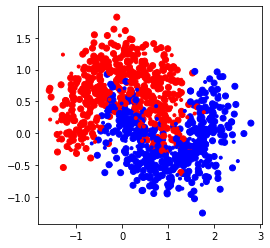

In [48]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 6.1. AdaBoost alphas and distributions (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [50]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    e = sum(distribution[y!=y_pred_t])
    
    alpha = 0.5*np.log((1 - e+1e-5)/(e+1e-5))
    
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    new_dist = distribution*np.exp(-1*y*y_pred_t*alpha_t)
    new_dist /= sum(new_dist)
    distribution = new_dist
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 6.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [51]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_pred_t = self.classifiers[-1].predict(X)
            # update alphas, append new alpha to self.alphas
            self.alphas.append(self.get_alpha(y, y_pred_t, distribution))
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred_t, distribution, self.alphas[-1])
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        #get the weighted votes of the classifiers
        for i in range(self.n_estimators):
            final_predictions += self.alphas[i]*self.classifiers[i].predict(X)
        
        out = np.sign(final_predictions)
        ### END Solution (do not delete this comment)

        return out

In [52]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [53]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.895
accuracy ada_boost_sklearn: 0.89


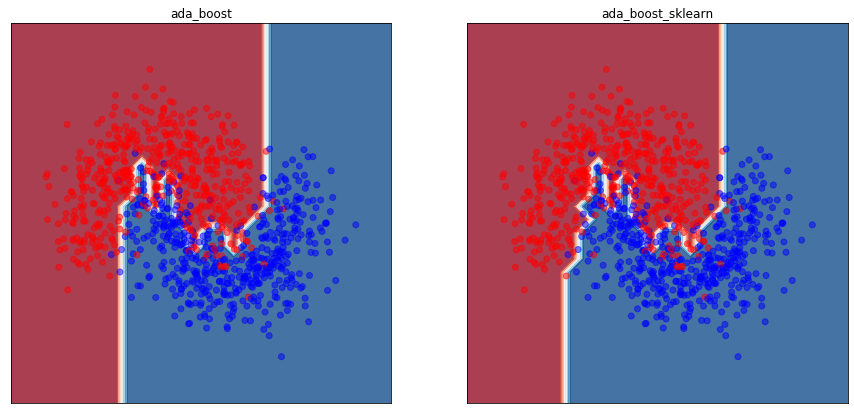

In [54]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 7. Gradient Boosting (1+1 point)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

### Subproblem 7.1. XGBoost vs. Random Forest (1 point)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest.

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for XGBoost: 0.26105975000064063
Average precision score for XGBoost: 0.6890433304965553
Training time for Random Forest:  0.5837159650000103
Average precision score for Random Forest: 0.714336603333863


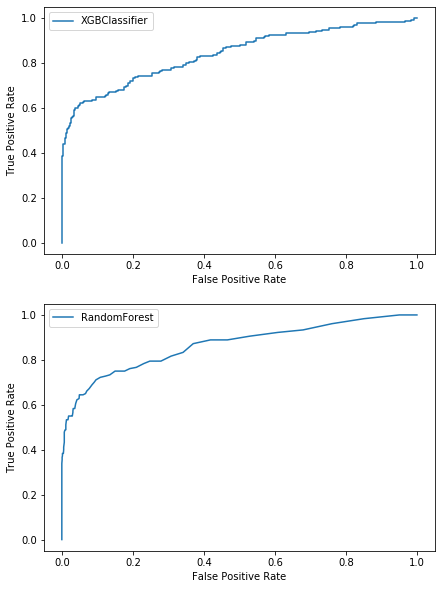

In [30]:
### BEGIN Solution (do not delete this comment)

from sklearn.metrics import roc_curve, average_precision_score

rnd = 42
fig, axs = plt.subplots(2, 1, figsize=(7, 10))

clf_xgb = XGBClassifier(random_state=rnd, verbosity=0)#(max_depth=10, n_estimators=100, objective='binary:logistic', verbosity = 0)
t_start = time.perf_counter()
clf_xgb.fit(X_train, y_train)
print('Training time for XGBoost:', time.perf_counter() - t_start)
y_pred_xgb = clf_xgb.predict_proba(X_test)[:, 1]
print('Average precision score for XGBoost:', average_precision_score(y_test, y_pred_xgb))
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
axs[0].plot(fpr_xgb, tpr_xgb, label='XGBClassifier')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_xlabel('False Positive Rate')
axs[0].legend()

clf_rndf = RandomForestClassifier(random_state=rnd)
t_start = time.perf_counter()
clf_rndf.fit(X_train, y_train)
print('Training time for Random Forest: ', time.perf_counter() - t_start)
y_pred_rndf = clf_rndf.predict_proba(X_test)[:, 1]
print('Average precision score for Random Forest:', average_precision_score(y_test, y_pred_rndf))\
# plot_roc_curve(clf, X)
fpr_rndf, tpr_rndf, _ = roc_curve(y_test, y_pred_rndf)
axs[1].plot(fpr_rndf, tpr_rndf, label='RandomForest')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_xlabel('False Positive Rate')
axs[1].legend();

### END Solution (do not delete this comment)

### Subproblem 7.2. Feature importances (1 point)

Extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers.

Text(0.5, 1.0, 'RandomForest Feature Importances')

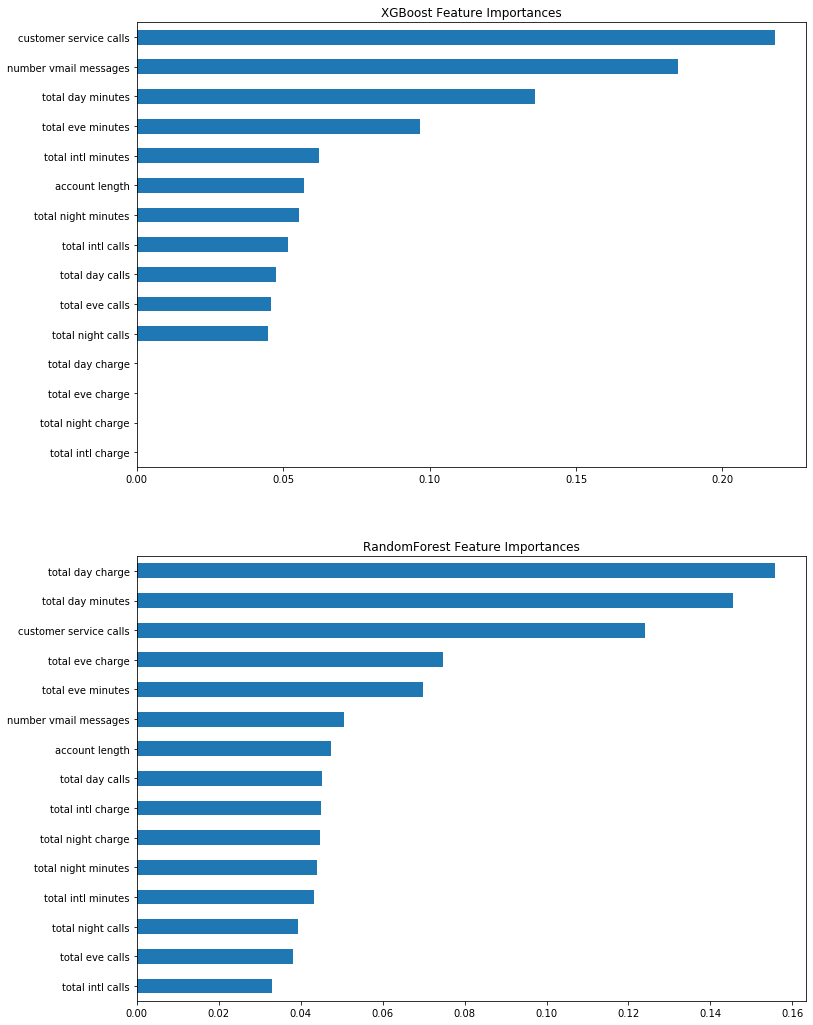

In [31]:
### BEGIN Solution (do not delete this comment)
from xgboost import plot_importance
fig, ax = plt.subplots(2, 1, figsize=(12,18))
features = X_train.columns

fi = pd.Series(clf_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fi.sort_values(ascending=True).plot.barh(ax=ax[0])
ax[0].set_title('XGBoost Feature Importances')

fi = pd.Series(clf_rndf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fi.sort_values(ascending=True).plot.barh(ax=ax[1])
ax[1].set_title('RandomForest Feature Importances')
### END Solution (do not delete this comment)

Are they different or the same, why?

**Your text answer (do not delete this comment)**:

The bar plots are different, what can be explained by how algorithms use features during the construction.

Both algorithms use decision trees under the hood to construct a more advanced model.
* **Random Forest** builds a set of trees on the random subset of train data and on the random subset of features and all tree estimators are averaged afterwards. So, the feature importance is measured during each tree construction and the final feature importance is an average over all the trees. Though features are drawn randomly at each tree, there still an equal chance for every feature to contribute to a new tree construction even if this feature is correlated with features used in the other trees of the forest. This is also a reason why the whole modele used all features. 
* **Gradient Boosting** instead of Random Forest is built sequentialy, enhancing the whole model by learning new simple trees to correct the mistakes (predict residuals) of the previous models. In this approach algorithm tends to exploit the same set of uncorellated features and doesn't add correlated ones as they do not improve a split of the dataset.